In [1]:
import random

# Generate random data for age, gender, smoking status, and weight status
age = [random.randint(20, 60) for _ in range(50)]
gender = [random.choice(["Male", "Female"]) for _ in range(50)]
smoking_status = [random.choice(["Yes", "No"]) for _ in range(50)]
weight_status = [random.choice(["Normal", "Overweight", "Obese"]) for _ in range(50)]

# Determine health risk classes (for example, in an ordered manner)
risk = ["Low Risk", "Medium Risk", "High Risk"] * 16 + ["Low Risk"] * 2

# Write the data to a CSV file
import csv

data = list(zip(age, gender, smoking_status, weight_status, risk))

with open('health.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Age', 'Gender', 'Smoking', 'Weight Status', 'Risk'])
    writer.writerows(data)

print('Balanced CSV file successfully created: health.csv')

Balanced CSV file successfully created: health.csv


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('health.csv')

df.head()

,Age,Gender,Smoking,Weight Status,Risk
0,29,Male,No,Normal,Low Risk
1,44,Female,Yes,Normal,Medium Risk
2,29,Male,Yes,Obese,High Risk
3,55,Male,No,Overweight,Low Risk
4,53,Female,No,Obese,Medium Risk


In [3]:
df.describe()

,Age
count,50.000000
mean,40.100000
std,12.604259
min,20.000000
25%,29.000000
50%,40.500000
75%,51.750000
max,60.000000


In [4]:
from matplotlib import pyplot as plt

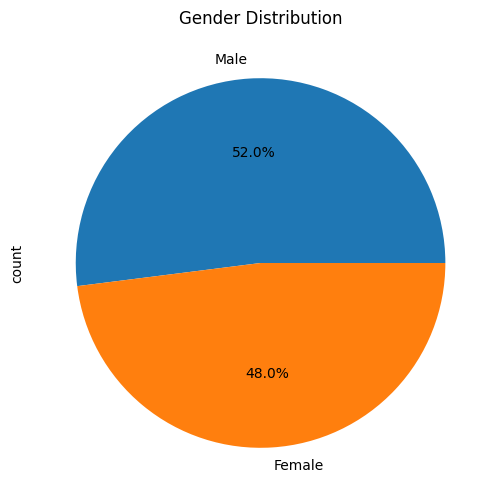

In [5]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

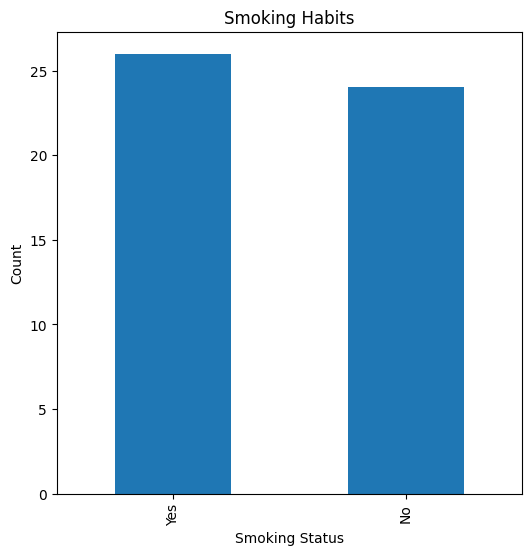

In [6]:
plt.figure(figsize=(6, 6))
df['Smoking'].value_counts().plot(kind='bar')
plt.title('Smoking Habits')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [7]:
import seaborn as sns

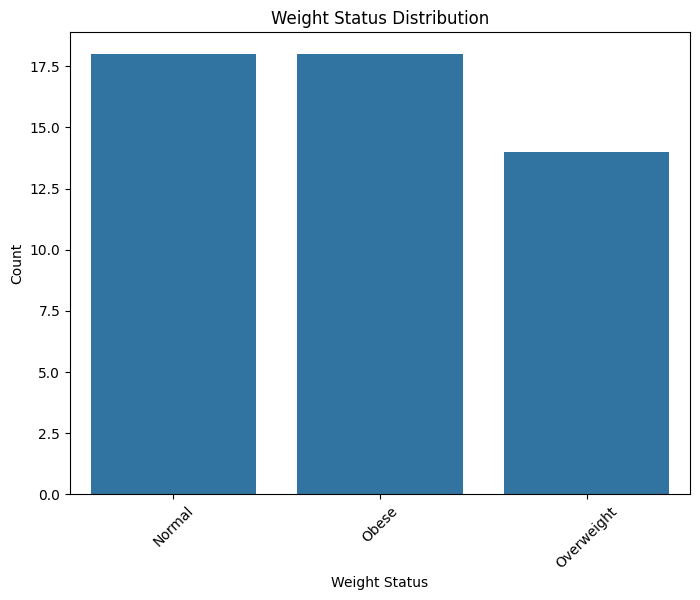

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weight Status')
plt.title('Weight Status Distribution')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

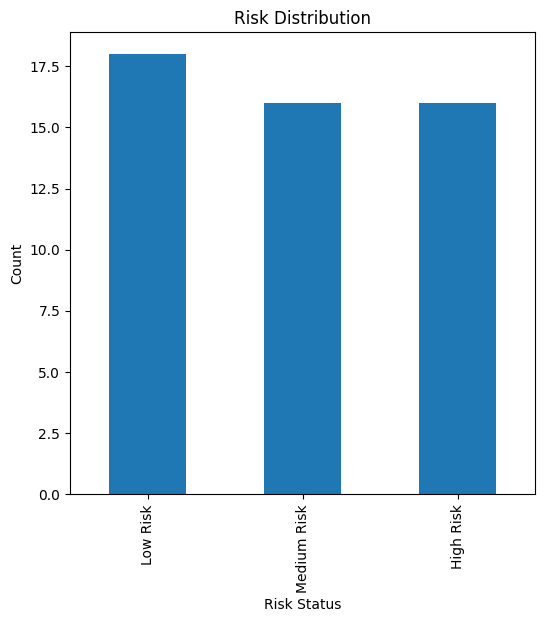

In [9]:
plt.figure(figsize=(6, 6))
df['Risk'].value_counts().plot(kind='bar')
plt.title('Risk Distribution')
plt.xlabel('Risk Status')
plt.ylabel('Count')
plt.show()

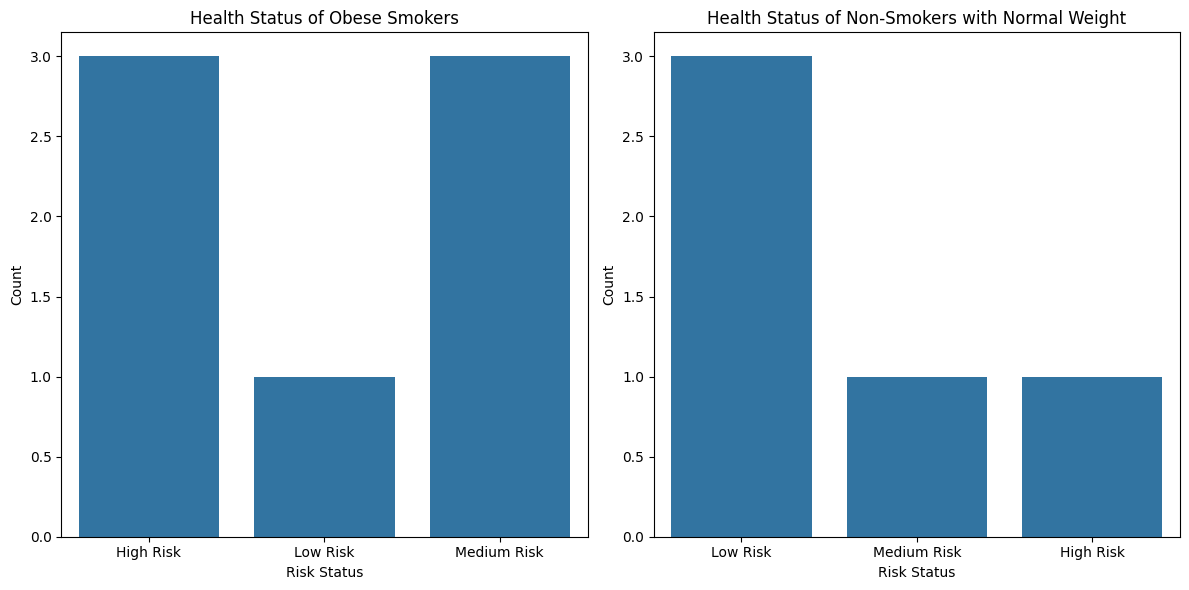

In [10]:
# Health status of individuals who are both obese and smoke
obese_smokers_health = df[(df['Weight Status'] == 'Obese') & (df['Smoking'] == 'Yes')]

# Health status of non-smokers with normal weight
normal_weight_non_smokers_health = df[(df['Weight Status'] == 'Normal') & (df['Smoking'] == 'No')]

# Plot the graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=obese_smokers_health, x='Risk')
plt.title('Health Status of Obese Smokers')
plt.xlabel('Risk Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=normal_weight_non_smokers_health, x='Risk')
plt.title('Health Status of Non-Smokers with Normal Weight')
plt.xlabel('Risk Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the data
data = pd.read_csv('health.csv')

# Prepare the data for the classification model
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Smoking'] = le.fit_transform(data['Smoking'])
data['Weight Status'] = le.fit_transform(data['Weight Status'])
data['Risk'] = le.fit_transform(data['Risk'])

# Separate independent variables (X) and dependent variable (y)
X = data.drop('Risk', axis=1)
y = data['Risk']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the classification model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the Model:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy Score of the Model: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.25      0.29         4
           2       0.17      0.33      0.22         3

    accuracy                           0.20        10
   macro avg       0.17      0.19      0.17        10
weighted avg       0.18      0.20      0.18        10



In [12]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy Score:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Decision Tree Model Accuracy Score: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.40      0.50      0.44         4
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.30      0.39      0.34        10
weighted avg       0.31      0.40      0.35        10



KÖTÜ MODEL ÖRNEĞİ

In [13]:
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machines (SVM) model
model = SVC(kernel='linear')  # You can use a linear SVM, different kernels can also be tried.

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the SVM Model:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy Score of the SVM Model: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.36      0.42      0.38        10
weighted avg       0.36      0.40      0.37        10



In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-Nearest Neighbors (k-NN) model with k=5 (you can adjust the k value)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the k-NN Model:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy Score of the k-NN Model: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.33      0.25      0.29         4
           2       0.25      0.33      0.29         3

    accuracy                           0.30        10
   macro avg       0.31      0.31      0.30        10
weighted avg       0.31      0.30      0.30        10



In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-Nearest Neighbors (k-NN) model with k=10 (you can adjust the k value)
model = KNeighborsClassifier(n_neighbors=10)

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the k-NN Model:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy Score of the k-NN Model: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         4
           2       0.33      0.33      0.33         3

    accuracy                           0.20        10
   macro avg       0.18      0.22      0.19        10
weighted avg       0.16      0.20      0.17        10



Increasing or decreasing the value of the n_neighbors parameter may affect the performance of the k-NN model. This parameter determines the number of neighbors used to estimate each data point. Different values of the parameter can produce different results:

Smaller n_neighbors Value:

Decreasing the value of n_neighbors uses fewer neighbors around each data point.
The model is more sensitive and more responsive to noisy data.
The risk of overfitting may increase, meaning the model may overfit training data, but its ability to generalize to testing data may decrease.

Larger n_neighbors Value:

Increasing the value of n_neighbors uses more neighbors around each data point.
The model will have lower complexity and can produce smoother predictions.
There is a high probability of obtaining a more generalizing model.
However, too large a value of n_neighbors may cause the model to have extremely low complexity and include too many neighbors to discriminate.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 11):  # Try each k value from 1 to 10
    model = KNeighborsClassifier(n_neighbors=i)

    # Train the model
    model.fit(X_train, y_train)

    # Test the performance of the model
    y_pred = model.predict(X_test)

    print("-------------------------------------------------")
    print(f"When k is {i}.")

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score of the k-NN Model:", accuracy)

    # Classification report
    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", classification_rep)

-------------------------------------------------
When k is 1.
Accuracy Score of the k-NN Model: 0.1
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.08      0.11      0.10        10
weighted avg       0.07      0.10      0.09        10

-------------------------------------------------
When k is 2.
Accuracy Score of the k-NN Model: 0.1


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3

    accuracy                           0.10        10
   macro avg       0.07      0.11      0.08        10
weighted avg       0.06      0.10      0.07        10

-------------------------------------------------
When k is 3.
Accuracy Score of the k-NN Model: 0.3
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.33      0.25      0.29         4
           2       0.25      0.33      0.29         3

    accuracy                           0.30        10
   macro avg       0.31      0.31      0.30        10
weighted avg       0.31      0.30      0.30        10

-------------------------------------------------
When k is 4.
Accuracy Score of the k-NN

In [17]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a maximum of 1000 iterations
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Test the performance of the model
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the Logistic Regression Model:", accuracy)

# Classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy Score of the Logistic Regression Model: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.36      0.42      0.38        10
weighted avg       0.36      0.40      0.37        10



max_iter is a hyperparameter that determines the number of iterations (i.e. the number of repetitions) during the training process of the Logistic Regression model. Logistic Regression trains model parameters using an optimized algorithm. This optimization algorithm tries to minimize the loss function of the model. The max_iter parameter determines how many iterations this algorithm will run. This controls how long the model should be optimized.

How to determine the max_iter parameter depends on your problem and dataset. The value is related to the training time and optimization time of the model. Here are some guidelines for determining the max_iter parameter:

Initially, a value used in many machine learning applications will usually suffice, such as 100 or 1000. These values may be appropriate for most datasets.

However, if you receive a ConvergenceWarning error before the training period is completed or if you think that the model cannot achieve the desired level of convergence (i.e. optimizing), you can increase the max_iter value.

Also, if you find that the training time is taking too long or the model tends to overfit, you can reduce the max_iter value.

In some implementations, you can automatically tune max_iter using automatic hyperparameter tuning techniques. This usually sets the max_iter value to a value that gives the best results.